# import Library

In [30]:
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Define the path to the dataset

In [31]:
dataset_path = "/home/abdullah/Desktop/support vector machine (SVM)/train"

# Function to load images and labels


In [32]:
def load_data(dataset_path):
    images = []
    labels = []
    for label in os.listdir(dataset_path):
        label_path = os.path.join(dataset_path, label)
        for image_file in os.listdir(label_path):
            image_path = os.path.join(label_path, image_file)
            image = cv2.imread(image_path)
            image = cv2.resize(image, (64, 64))  # Resize image to a fixed size
            images.append(image)
            labels.append(label)
    return np.array(images), np.array(labels)

# Load the dataset

In [33]:
images, labels = load_data(dataset_path)

# Convert labels to numerical format


In [34]:
labels = np.where(labels == 'cat', 0, 1)

# Flatten the images


In [35]:
images = images.reshape(images.shape[0], -1)

# Split data into training and testing sets


In [36]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


# Train SVM model

In [37]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

# Make predictions


In [38]:
y_pred = svm_model.predict(X_test)

# Evaluate the model


In [39]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.5377906976744186
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.55      0.54       334
           1       0.55      0.52      0.54       354

    accuracy                           0.54       688
   macro avg       0.54      0.54      0.54       688
weighted avg       0.54      0.54      0.54       688



# Dimensionality reduction using PCA


In [40]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Plot training points


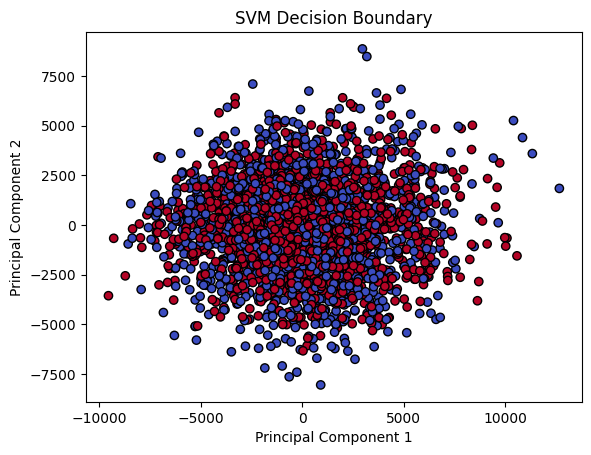

In [41]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title('SVM Decision Boundary')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()